## Analysing Technical Issues for Customers

---

Description : Analysing Technical Issues for Customers

Author : Mohamed Kamran

Last Modified : 22 December 2024


For the Kaggle Input Dataset

https://www.kaggle.com/datasets/steve1215rogg/tech-support-conversations-dataset

In [51]:
# First Analyse the CSV using Head and reading attributes

import pandas
data = pandas.read_csv("/kaggle/input/tech-support-conversations-dataset/tech_support_dataset.csv")
#data.columns
#len(data)
data.head()

,Conversation_ID,Customer_Issue,Tech_Response,Resolution_Time,Issue_Category,Issue_Status
0,CONV-0001,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,92 minutes,Software,Pending
1,CONV-0002,Software installation failure,Reinstall the printer drivers.,76 minutes,Account,Pending
2,CONV-0003,Cannot connect to Wi-Fi,Clear cache and remove unnecessary programs.,50 minutes,Network,Resolved
3,CONV-0004,Forgot password,Reset your password using the link provided.,97 minutes,Performance,Pending
4,CONV-0005,Software installation failure,Follow the software installation guide.,110 minutes,Performance,Pending


In [21]:
# Clean the data
data['Resolution_Time'] = data['Resolution_Time'].astype(str).str.extract('(\d+)').astype(int)
data['Issue_Category'] = data['Issue_Category'].str.capitalize()
data['Issue_Status'] = data['Issue_Status'].str.capitalize()
data = data.dropna()

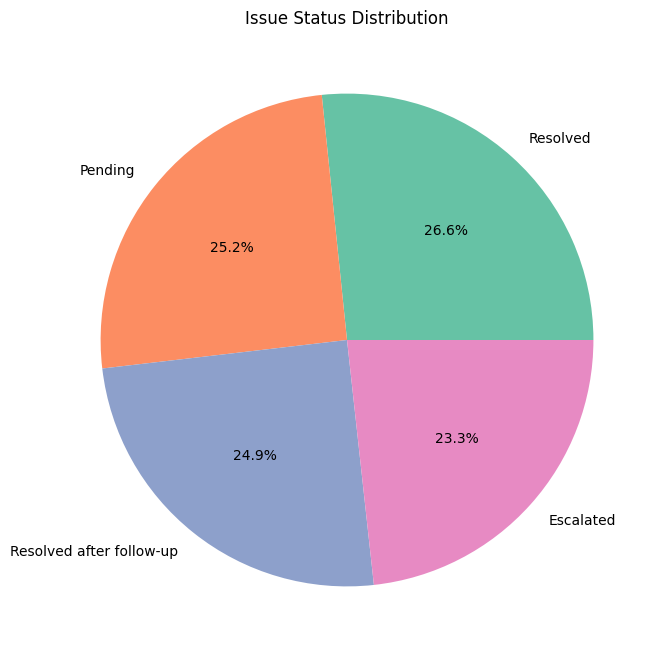

In [22]:
# Pie chart for Issue_Status distribution
import seaborn as sns
import matplotlib.pyplot as plt
issue_status_counts = data['Issue_Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(issue_status_counts, labels=issue_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(issue_status_counts)))
plt.title('Issue Status Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


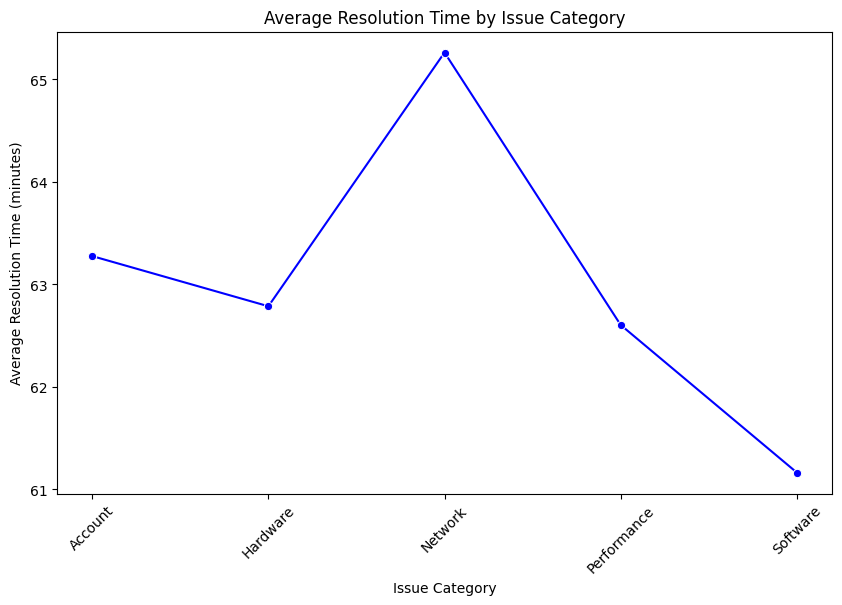

In [23]:
# Calculate the average resolution time per issue category
avg_resolution_time = data.groupby('Issue_Category')['Resolution_Time'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Issue_Category', y='Resolution_Time', data=avg_resolution_time, marker='o', color='b')
plt.title('Average Resolution Time by Issue Category')
plt.xlabel('Issue Category')
plt.ylabel('Average Resolution Time (minutes)')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


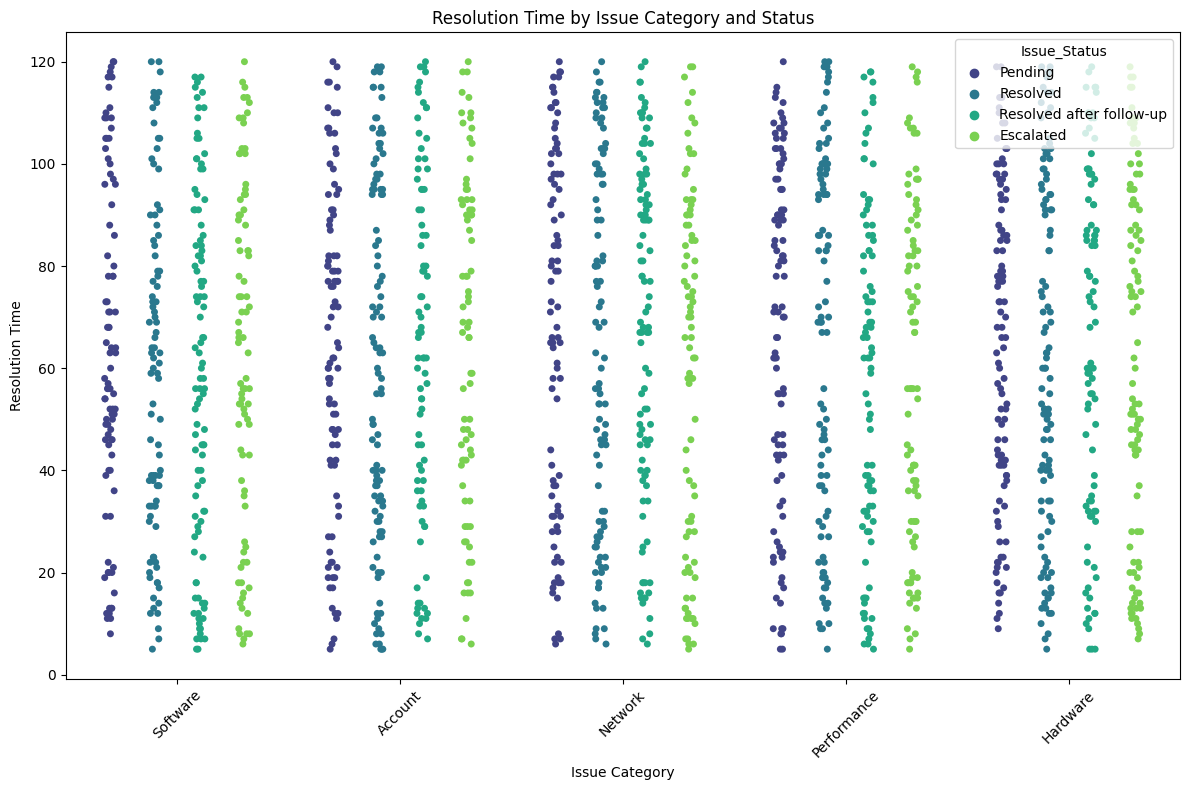

In [50]:
# Scatter Plot with Jitter: Resolution Time by Issue Category and Statu
plt.figure(figsize=(12, 8))
sns.stripplot(
    x='Issue_Category',
    y='Resolution_Time',
    hue='Issue_Status',
    data=data,
    palette='viridis',
    jitter=True, 
    dodge=True,  
)
plt.title('Resolution Time by Issue Category and Status')
plt.xlabel('Issue Category')
plt.ylabel('Resolution Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

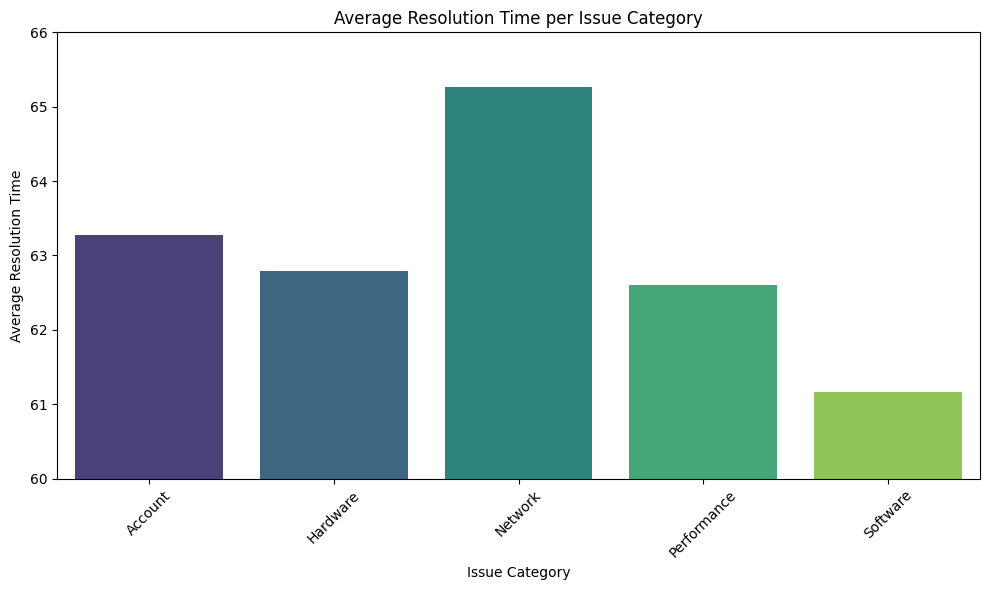

In [32]:
# Calculate the average Resolution_Time per Issue_Category
avg_resolution_time = data.groupby('Issue_Category')['Resolution_Time'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Issue_Category', y='Resolution_Time', data=avg_resolution_time, palette='viridis')
plt.title('Average Resolution Time per Issue Category')
plt.xlabel('Issue Category')
plt.ylabel('Average Resolution Time')
plt.xticks(rotation=45)
plt.ylim(60, 66)
plt.tight_layout()
plt.show()

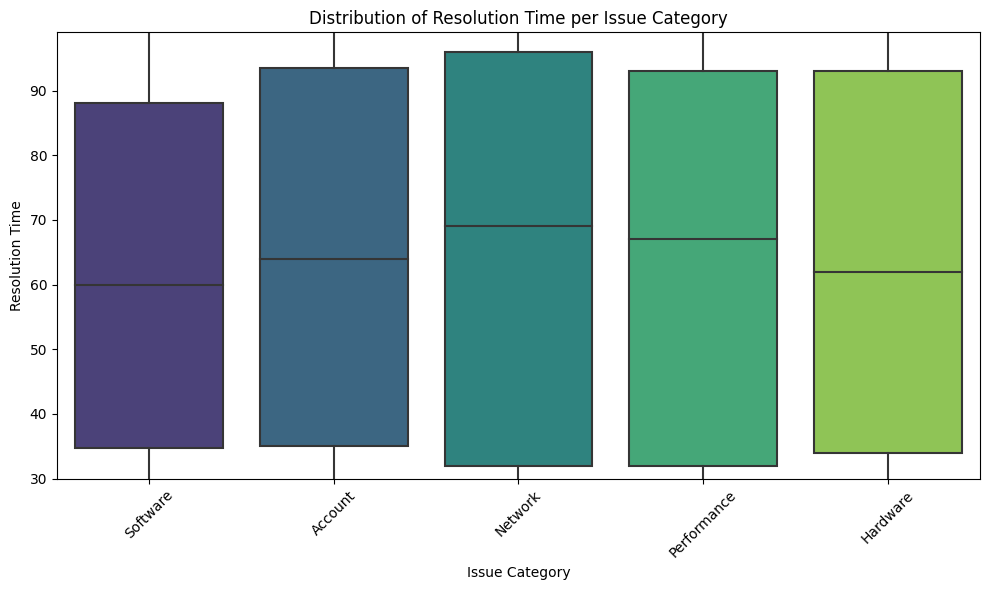

In [36]:
# Create a boxplot to visualize the distribution of Resolution_Time by Issue_Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Issue_Category', y='Resolution_Time', data=data, palette='viridis')
plt.title('Distribution of Resolution Time per Issue Category')
plt.xlabel('Issue Category')
plt.ylabel('Resolution Time')
plt.xticks(rotation=45)
plt.ylim(30, 99)
plt.tight_layout()
plt.show()

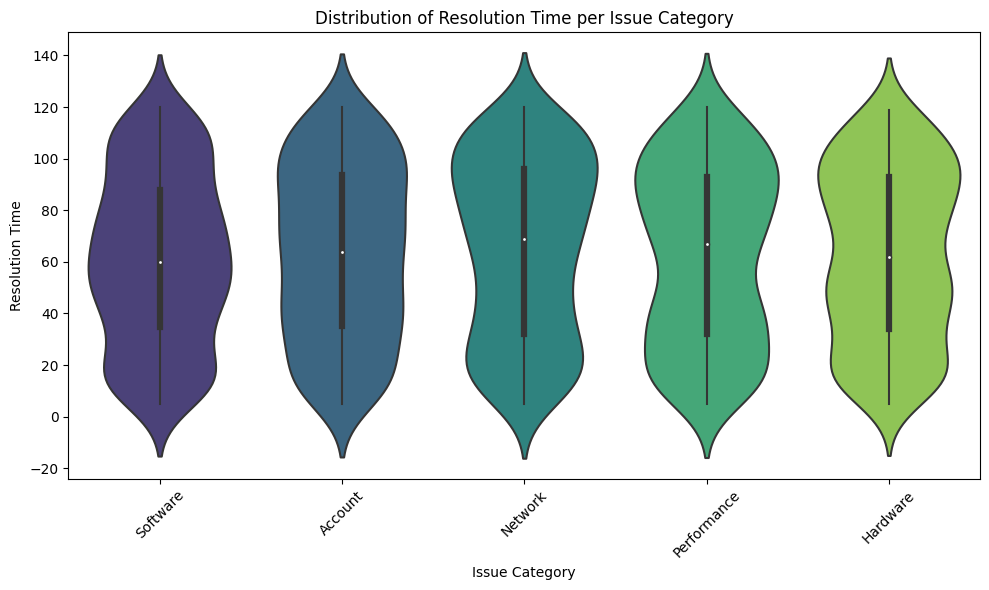

In [41]:
# Create a violin plot to visualize the distribution of Resolution_Time by Issue_Category
plt.figure(figsize=(10, 6))
sns.violinplot(x='Issue_Category', y='Resolution_Time', data=data, palette='viridis')t
plt.title('Distribution of Resolution Time per Issue Category')
plt.xlabel('Issue Category')
plt.ylabel('Resolution Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


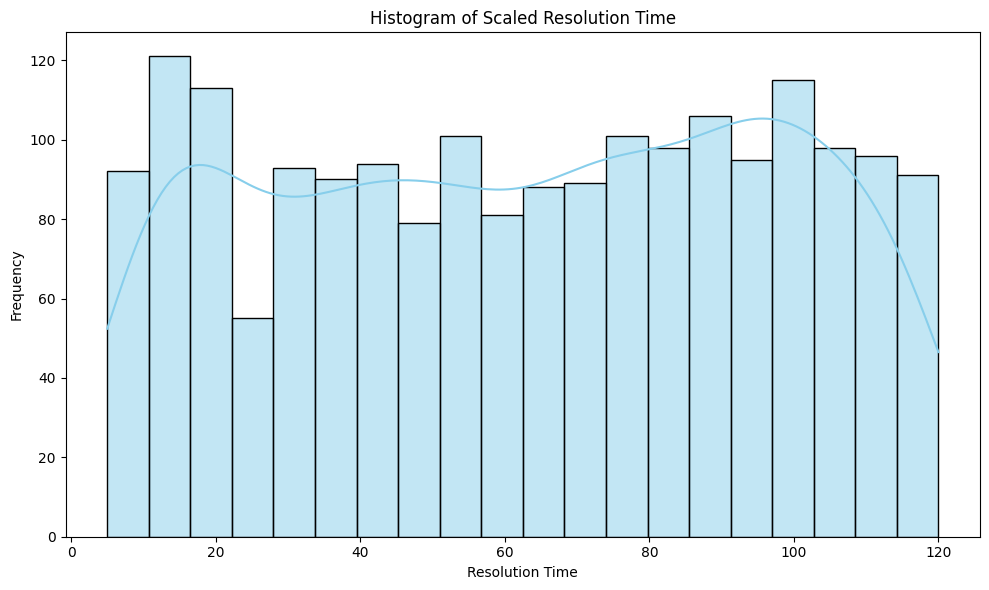

In [46]:
# Histogram v/s Resolution Time
plt.figure(figsize=(10, 6))
sns.histplot(data['Resolution_Time'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Frequency of Resolutuon time')
plt.xlabel('Resolution Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()